In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [7]:
df.shape

(4653, 9)

In [17]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


                                                         EXPLORATORY DATA ANALYSIS

In [43]:
#Percentage of employees benched 
benched=df['EverBenched'].str.lower().value_counts().get('yes',0)
not_benched=df['EverBenched'].str.lower().value_counts().get('no',0)
Total_employees=benched+not_benched
percentage_of_benched_employees=(benched/Total_employees)*100
percentage_of_benched_employees

10.272942187835806

In [57]:
#Cities which the Employees belong to
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [75]:
#Attrition Rate of the company
Employees_left=df['LeaveOrNot'].value_counts().get(1)
Total_employees=df.shape[0]
Attrition_rate=(Employees_left/Total_employees)*100
round(Attrition_rate,2)

34.39

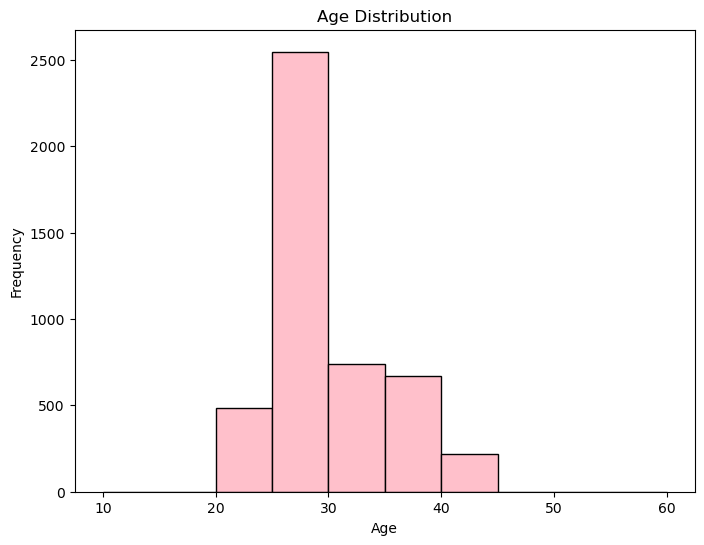

In [85]:
#Age distribution of the employees
plt.figure(figsize=(8,6))
plt.hist(df['Age'],bins=[10,15,20,25,30,35,40,45,50,55,60],color='pink',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [89]:
#% of employees who completed their bachelors,masters or phd and joined
df['Education'].value_counts()

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

In [93]:
labels=df['Education'].value_counts().index.tolist()
labels

['Bachelors', 'Masters', 'PHD']

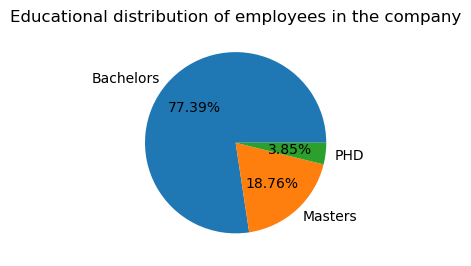

In [111]:
plt.figure(figsize=(3,3))
plt.pie(x=df['Education'].value_counts(),labels=labels,autopct="%1.2f%%")
plt.title("Educational distribution of employees in the company")
plt.tight_layout()
plt.show()

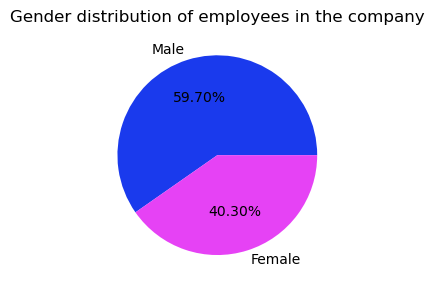

In [113]:
#Gender distribution
labels1=df['Gender'].value_counts().index.tolist()
labels1
plt.figure(figsize=(3,3))
plt.pie(x=df['Gender'].value_counts(),labels=labels1,colors=['#1a3aed','#e642f5'],autopct="%1.2f%%")
plt.title("Gender distribution of employees in the company")
plt.tight_layout()
plt.show()

C:\Users\Merlin\AppData\Local\Temp\ipykernel_9564\2263605846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentTier',data=df,palette=['#db0469','#029ec9','#02a124'])


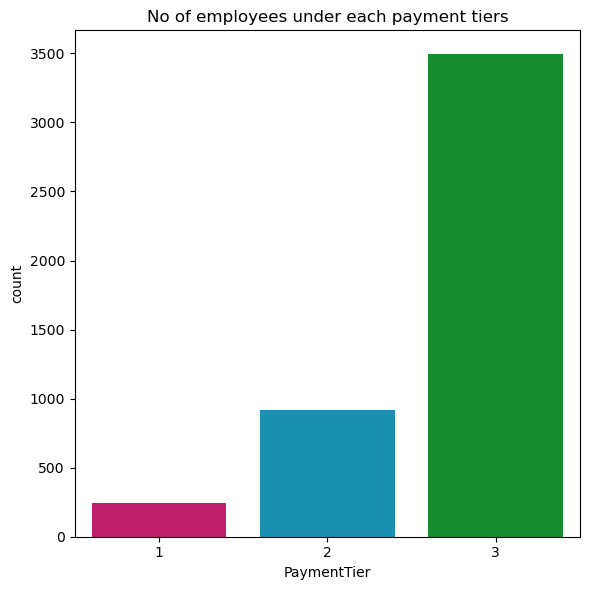

In [147]:
labels2=df['PaymentTier'].value_counts().index.tolist()
labels2
plt.figure(figsize=(6,6))
sns.countplot(x='PaymentTier',data=df,palette=['#db0469','#029ec9','#02a124'])
plt.title("No of employees under each payment tiers")
plt.tight_layout()
plt.show()

                                                               DATA PREPROCESSING

In [149]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [155]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

CATEGORICAL ENCODING

In [175]:
df.drop(columns=['JoiningYear'],inplace=True)
df

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,Bangalore,3,34,Male,No,0,0
1,Bachelors,Pune,1,28,Female,No,3,1
2,Bachelors,New Delhi,3,38,Female,No,2,0
3,Masters,Bangalore,3,27,Male,No,5,1
4,Masters,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...
4648,Bachelors,Bangalore,3,26,Female,No,4,0
4649,Masters,Pune,2,37,Male,No,2,1
4650,Masters,New Delhi,3,27,Male,No,5,1
4651,Bachelors,Bangalore,3,30,Male,Yes,2,0


In [179]:
df['PaymentTier']=df['PaymentTier'].astype('category')
categorical_cols=['Education','City','PaymentTier','Gender','EverBenched']
encoded_cols=pd.get_dummies(df[categorical_cols],prefix="cat")

In [181]:
encoded_cols.columns

Index(['cat_Bachelors', 'cat_Masters', 'cat_PHD', 'cat_Bangalore',
       'cat_New Delhi', 'cat_Pune', 'cat_1', 'cat_2', 'cat_3', 'cat_Female',
       'cat_Male', 'cat_No', 'cat_Yes'],
      dtype='object')

In [183]:
df=df.join(encoded_cols)

In [185]:
df.head()

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,cat_Bachelors,cat_Masters,...,cat_Bangalore,cat_New Delhi,cat_Pune,cat_1,cat_2,cat_3,cat_Female,cat_Male,cat_No,cat_Yes
0,Bachelors,Bangalore,3,34,Male,No,0,0,True,False,...,True,False,False,False,False,True,False,True,True,False
1,Bachelors,Pune,1,28,Female,No,3,1,True,False,...,False,False,True,True,False,False,True,False,True,False
2,Bachelors,New Delhi,3,38,Female,No,2,0,True,False,...,False,True,False,False,False,True,True,False,True,False
3,Masters,Bangalore,3,27,Male,No,5,1,False,True,...,True,False,False,False,False,True,False,True,True,False
4,Masters,Pune,3,24,Male,Yes,2,1,False,True,...,False,False,True,False,False,True,False,True,False,True


In [189]:
df.drop(['Education','City','PaymentTier','Gender','EverBenched'],inplace=True,axis="columns")

In [191]:
df.head(5)

,Age,ExperienceInCurrentDomain,LeaveOrNot,cat_Bachelors,cat_Masters,cat_PHD,cat_Bangalore,cat_New Delhi,cat_Pune,cat_1,cat_2,cat_3,cat_Female,cat_Male,cat_No,cat_Yes
0,34,0,0,True,False,False,True,False,False,False,False,True,False,True,True,False
1,28,3,1,True,False,False,False,False,True,True,False,False,True,False,True,False
2,38,2,0,True,False,False,False,True,False,False,False,True,True,False,True,False
3,27,5,1,False,True,False,True,False,False,False,False,True,False,True,True,False
4,24,2,1,False,True,False,False,False,True,False,False,True,False,True,False,True


In [195]:
df["Age"].max()

41

                                                        DATA SPLITTING TO TRAIN AND TEST

In [197]:
X=df.drop("LeaveOrNot",axis=1)
Y=df["LeaveOrNot"]

In [199]:
X.head()

,Age,ExperienceInCurrentDomain,cat_Bachelors,cat_Masters,cat_PHD,cat_Bangalore,cat_New Delhi,cat_Pune,cat_1,cat_2,cat_3,cat_Female,cat_Male,cat_No,cat_Yes
0,34,0,True,False,False,True,False,False,False,False,True,False,True,True,False
1,28,3,True,False,False,False,False,True,True,False,False,True,False,True,False
2,38,2,True,False,False,False,True,False,False,False,True,True,False,True,False
3,27,5,False,True,False,True,False,False,False,False,True,False,True,True,False
4,24,2,False,True,False,False,False,True,False,False,True,False,True,False,True


In [201]:
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64

In [203]:
from sklearn.model_selection import train_test_split

In [207]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)

In [209]:
X_train.shape

(3722, 15)

In [211]:
X_test.shape

(931, 15)

                                                             MODEL TRAINING

In [ ]:
#LOGISTIC REGRESSION MODEL

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [217]:
logReg=LogisticRegression(max_iter=2000)

In [219]:
logReg.fit(X_train,Y_train)

LogisticRegression(max_iter=2000)

In [227]:
logReg_predictions=logReg.predict(X_test)

In [229]:
accuracy_score(Y_test,logReg_predictions)

0.7325456498388829

In [231]:
print(classification_report(Y_test,logReg_predictions))

              precision    recall  f1-score   support

           0       0.73      0.92      0.82       601
           1       0.73      0.39      0.51       330

    accuracy                           0.73       931
   macro avg       0.73      0.65      0.66       931
weighted avg       0.73      0.73      0.71       931



In [233]:
cm=confusion_matrix(Y_test,logReg_predictions)
cm

array([[554,  47],
       [202, 128]], dtype=int64)

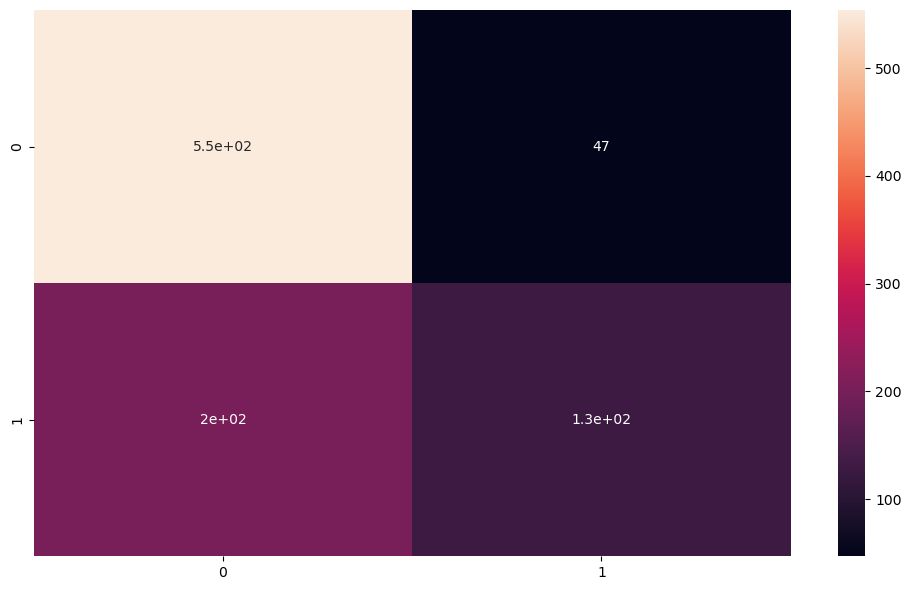

In [235]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.tight_layout()
plt.show()

Since predicting 1 is the priority, logistic regression is not a good model for prediction of employee turnover

In [ ]:
#Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [273]:
ranforest=RandomForestClassifier(max_depth=10,n_estimators=1000)

In [275]:
ranforest.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [277]:
ranforest_predictions=ranforest.predict(X_test)

In [279]:
accuracy_score(Y_test,ranforest_predictions)

0.7755102040816326

In [281]:
print(classification_report(Y_test,ranforest_predictions))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       601
           1       0.78      0.51      0.62       330

    accuracy                           0.78       931
   macro avg       0.78      0.72      0.73       931
weighted avg       0.78      0.78      0.76       931



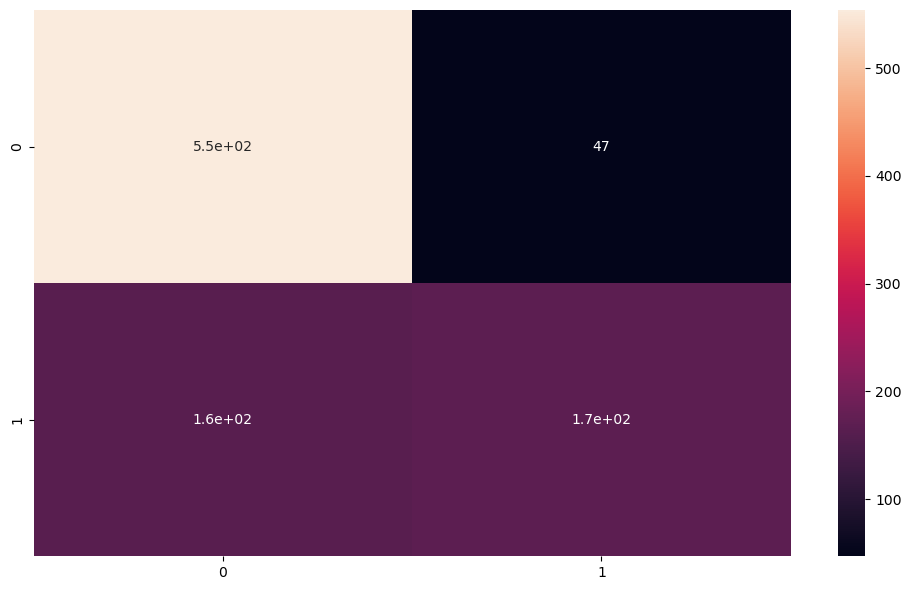

In [285]:
cm=confusion_matrix(Y_test,ranforest_predictions)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.tight_layout()
plt.show()

                                                          SAVE  MODEL